In [113]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
#loading the data
data = pd.read_csv('Documents/exit/dataset1.csv')

In [222]:
#displaying the first few rows of the data for getting a structure
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [214]:
# Q1 Calculate the mean, median, and standard deviation for the "DepTime" column. What insights can you draw from these measures? //

mean = data['DepTime'].mean() #to get the average DepTime  
median = data['DepTime'].median() #thw mid value among the rows is printed
std = data['DepTime'].std() #standard deviation shows how much the data is deviated from the mean values

print("Mean Departure Time:", mean)
print("Median Departure Time:", median)
print("Standard Deviation of Departure Time:", std)


Mean Departure Time: 1341.52388
Median Departure Time: 1330.0
Standard Deviation of Departure Time: 476.3784446151376


In [242]:
# Q3 Analyze the frequency distribution of flights across different "DayOfWeek." Which day of the week has the highest number of flights?
day_of_week_counts = data['DayOfWeek'].value_counts()

print("Flights per Day of the Week:\n", day_of_week_counts)
print("\nTop Day of the Week:", day_of_week_counts.idxmax(), "with", day_of_week_counts.max(), "flights\n") #printing the day with most no:of flights


Flights per Day of the Week:
 DayOfWeek
c-4    14736
c-5    14657
c-2    14604
c-1    14569
c-3    14508
c-7    14097
c-6    12829
Name: count, dtype: int64

Top Day of the Week: c-4 with 14736 flights



In [224]:
#Q4 How many unique "Origin" and "Dest" airports are present in the dataset?  //
origin =[]
origin = data['Origin'].unique()
print("There are ",len(origin),"unique Origin values")
Dest =[]
Dest = data['Dest'].unique()
print("There are ",len(Dest),"unique Dest values")

There are  290 unique Origin values
There are  290 unique Dest values


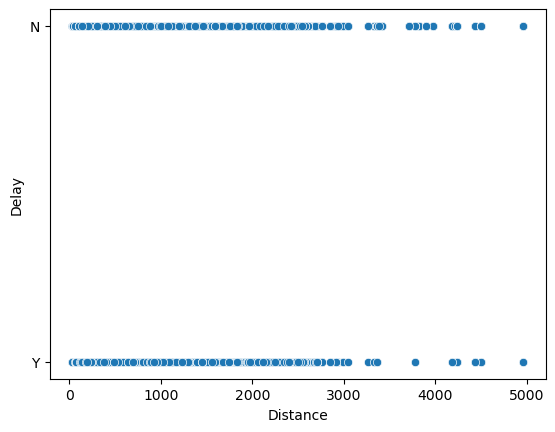

In [230]:
#Q5 Is there any relationship between the "Distance" and whether a flight is delayed? Use correlation or scatter plots to support your analysis.

delay = data['dep_delayed_15min'].unique()
sns.scatterplot(data=data,x='Distance',y='dep_delayed_15min')
#plt.figure(figsize=(8,6))
plt.xlabel('Distance')
plt.ylabel('Delay')
plt.show()


#As the distance increases there are cases where the flight has been delayed and not. So from the scatterplot we can say that the distance and delay are not is not connected

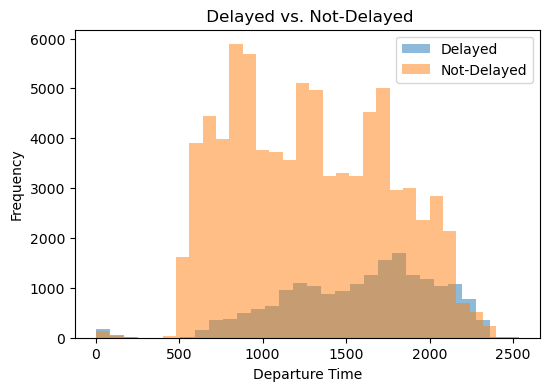

In [256]:
# Q8 Investigate whether there is a pattern in departure times for flights that were delayed ("dep_delayed_15min" = 'Y') compared to those that were not.

plt.figure(figsize=(6,4))
plt.hist(data[data['dep_delayed_15min'] == 'Y']['DepTime'].dropna(), bins=30, alpha=0.5, label='Delayed')
plt.hist(data[data['dep_delayed_15min'] == 'N']['DepTime'].dropna(), bins=30, alpha=0.5, label='Not-Delayed')
plt.xlabel('Departure Time')
plt.ylabel('Frequency')
plt.title(' Delayed vs. Not-Delayed')
plt.legend()
plt.show()

#for the same departure time there were flights which are delayed an not

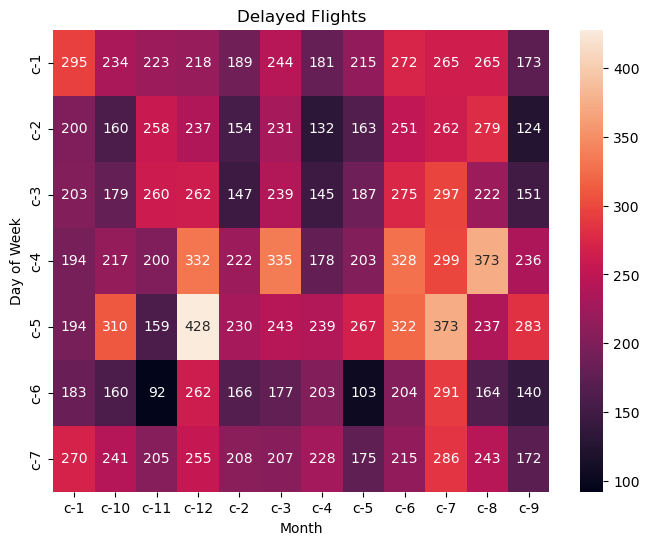

In [266]:
#Q10 Use a heatmap to show the relationship between "DayOfWeek" and "Month" with the number of delayed flights. What insights can you derive?


delay = data[data['dep_delayed_15min'] == 'Y'].pivot_table(index='DayOfWeek', columns='Month', aggfunc='size', fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(delay, annot=True, fmt="d")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.title("Delayed Flights")
plt.show()
